## Step 1 : Import libraries and models


In [1]:
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Step 2 : Import data

The data can be downloaded from the UCI machine learning repository

In [2]:
url =  'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = [ 'sepal-length' ,  'sepal-width' ,  'petal-length' ,  'petal-width' ,  'class' ]
dataset = read_csv(url, names=names)

## Step 3 : Descriptive analysis

In [5]:
print(dataset.shape)
print('----------------------------------')
print(dataset.head(20))

(150, 5)
----------------------------------
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4   

In [6]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
print(dataset.groupby( 'class' ).size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Step 4: Data visualization

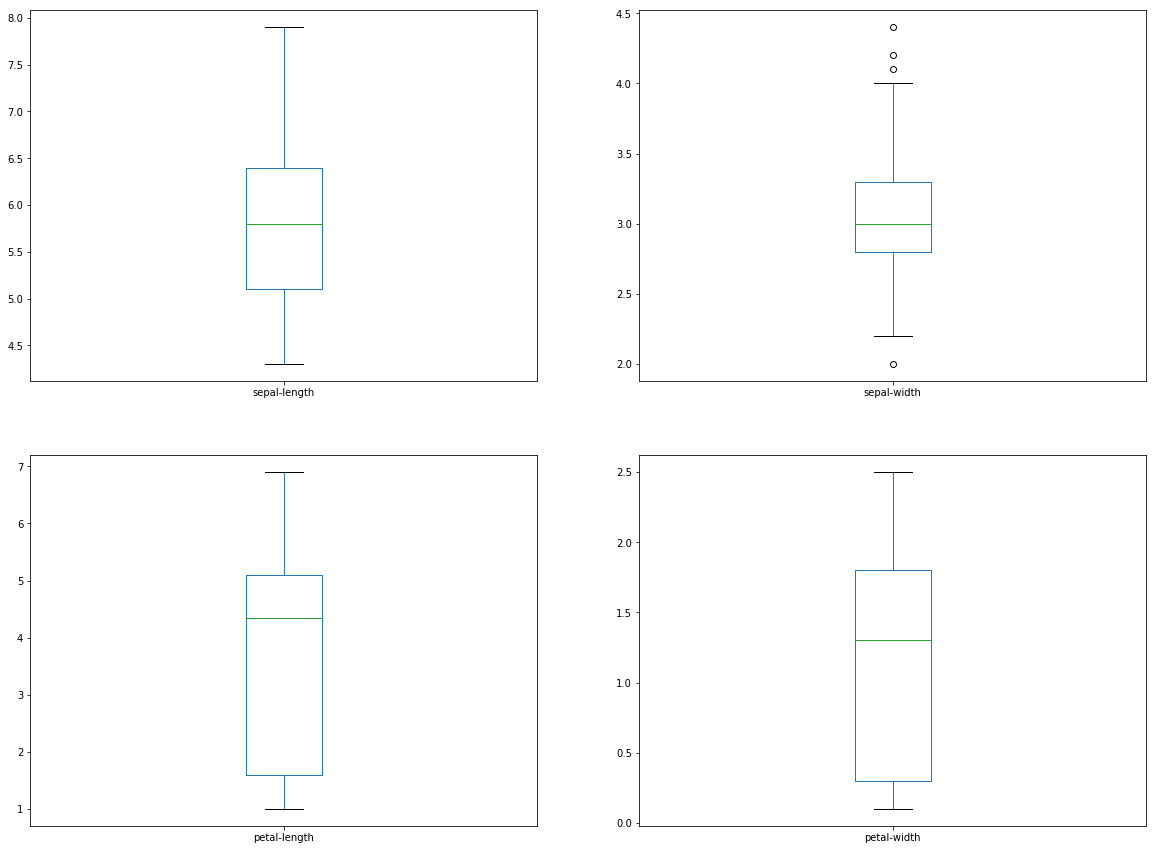

In [12]:
dataset.plot(kind= 'box' , subplots=True, layout=(2,2),figsize=(20,15) ,sharex = False, sharey=False)
pyplot.show()

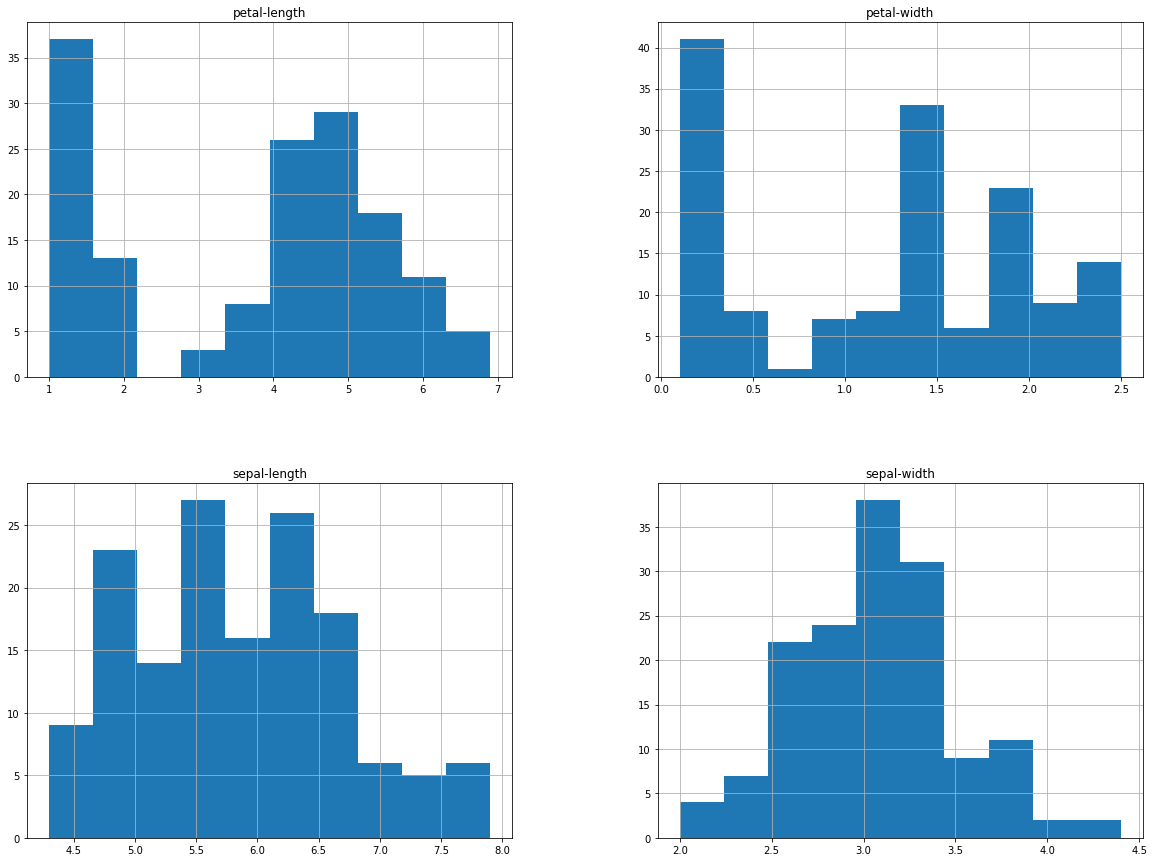

In [14]:
dataset.hist(figsize=(20,15))
pyplot.show()

/Users/karthik/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


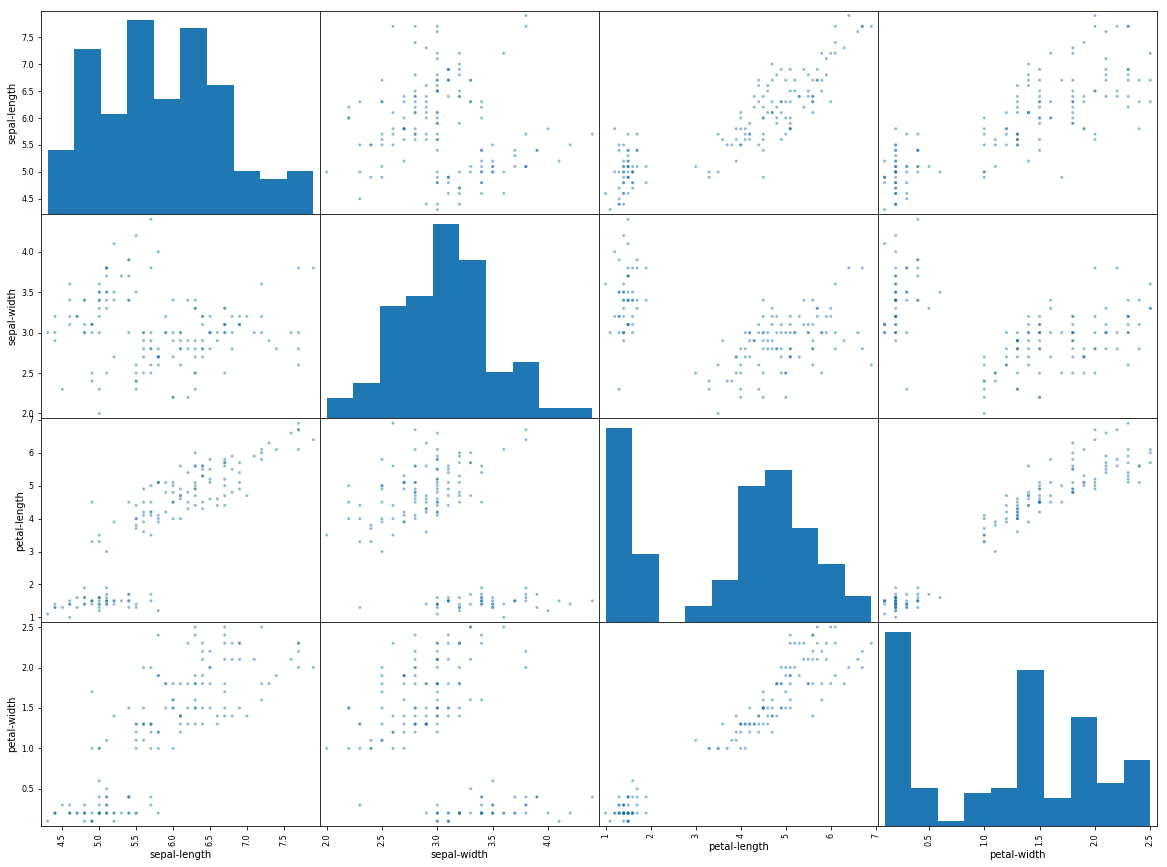

In [15]:
scatter_matrix(dataset,figsize=(20,15))
pyplot.show()

## Step 5 : Separate train and test datasets

In [16]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

## Step 6 : Compare the performance of various models using cross-validation

In [18]:
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring= 'accuracy' )
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


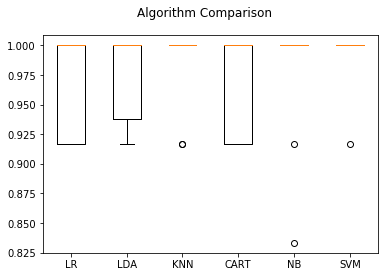

In [20]:
fig = pyplot.figure()
fig.suptitle( 'Algorithm Comparison' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Step 7 : Making predictions

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

